Creación de un pipeline para clasificación de texto
===

Preparación de datos
---

In [1]:
from sklearn.datasets import fetch_20newsgroups


X_train, y_train = fetch_20newsgroups(
    subset="train",
    return_X_y=True,
)

X_test, y_test = fetch_20newsgroups(
    subset="test",
    return_X_y=True,
)

Especificación del pipeline
---

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [
        # ---------------------------------------------------------------------
        # Convert a collection of text documents to a matrix of token counts.
        ("countVectorizer", CountVectorizer()),
        # ---------------------------------------------------------------------
        # Transform a count matrix to a normalized tf or tf-idf representation.
        ("tfidfTransformer", TfidfTransformer()),
        # ---------------------------------------------------------------------
        # Linear classifiers (SVM, logistic regression, etc.) with SGD training.
        ("sgdClassifier", SGDClassifier()),
    ]
)

Búsqueda de hiperparámetros óptimos
---

In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "countVectorizer__max_df": (0.5, 0.75, 1.0),
    "sgdClassifier__max_iter": (20,),
    "sgdClassifier__alpha": (0.00001, 0.000001),
    "sgdClassifier__penalty": ("l2", "elasticnet"),
}

gridSearchCV = GridSearchCV(
    pipeline,
    param_grid,
    n_jobs=-1,
)

gridSearchCV.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countVectorizer', CountVectorizer()),
                                       ('tfidfTransformer', TfidfTransformer()),
                                       ('sgdClassifier', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'countVectorizer__max_df': (0.5, 0.75, 1.0),
                         'sgdClassifier__alpha': (1e-05, 1e-06),
                         'sgdClassifier__max_iter': (20,),
                         'sgdClassifier__penalty': ('l2', 'elasticnet')})

In [4]:
gridSearchCV.best_score_

0.9205413031612613

In [5]:
best_parameters = gridSearchCV.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("{:>30s}: {:s}".format(param_name, repr(best_parameters[param_name])))

       countVectorizer__max_df: 0.75
          sgdClassifier__alpha: 1e-05
       sgdClassifier__max_iter: 20
        sgdClassifier__penalty: 'l2'


Evaluación
---

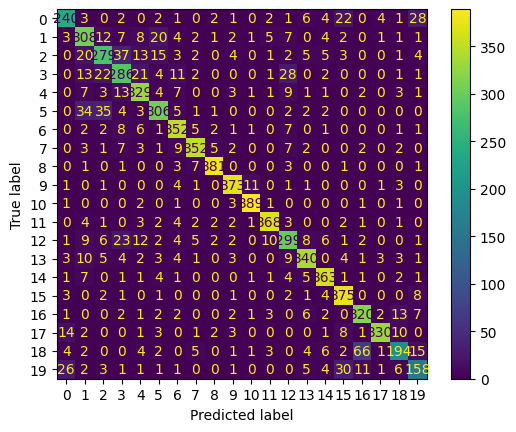

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = gridSearchCV.predict(X_test)

cm = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(20)).plot()